In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.wcs import WCS
plt.style.use(astropy_mpl_style)

In [74]:
diffim = get_pkg_data_filename('diff_Files-part1/ztf_20200206287824_000819_zg_c13_o_q2_scimrefdiffimg.fits')

In [75]:
with fits.open(diffim) as hdu:

    science_data1 = hdu[1].data
    science_header1 = hdu[1].header

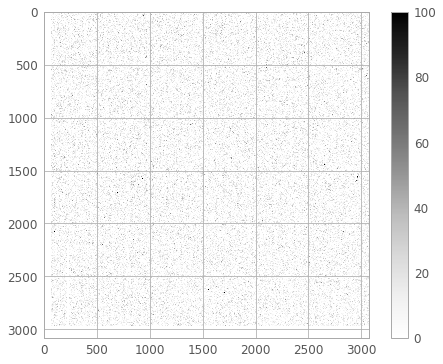

In [76]:
plt.figure()
plt.imshow(science_data1, interpolation='none', cmap='Greys', clim=(0,100))
plt.colorbar()

In [77]:
science_data1.shape

(3080, 3072)

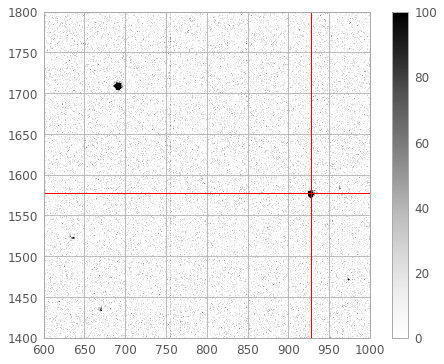

In [78]:
plt.figure()
plt.imshow(science_data1, interpolation='none', cmap='Greys', clim=(0,100))
plt.xlim(600,1000)
plt.ylim(1400,1800)
plt.vlines(928, 0, 2000, color='r', lw=1)
plt.hlines(1577, 0, 2000, color='r', lw=1)
plt.colorbar()

In [79]:
w = WCS(science_header1)
tra, tdec = w.wcs_pix2world(928., 1577., 1)
print(tra, tdec)

186.08957740114806 65.31211780184103


In [80]:
ralim, declim = w.wcs_pix2world([0,science_data1.shape[0]], [0,science_data1.shape[1]], 1)
print(ralim, declim)

[186.82591419 184.57051682] [65.72671021 64.94409859]


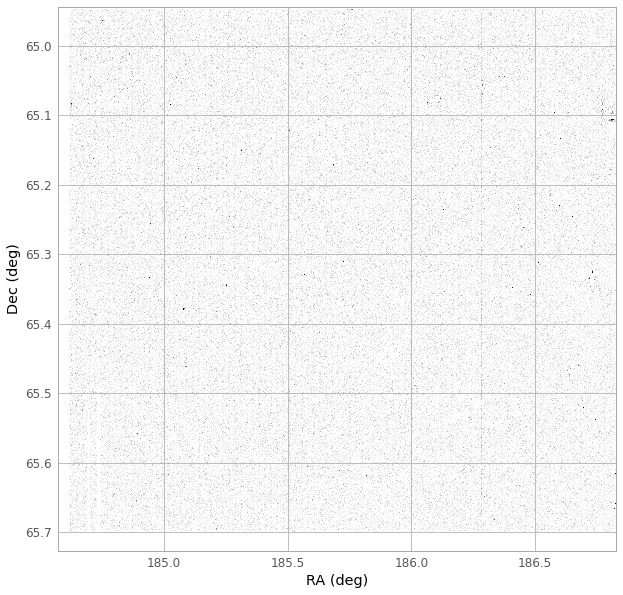

In [322]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(science_data1, interpolation='none', cmap='Greys', 
          extent = [ralim[1], ralim[0], declim[0], declim[1]], clim = (0,100), aspect='auto')

plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)");

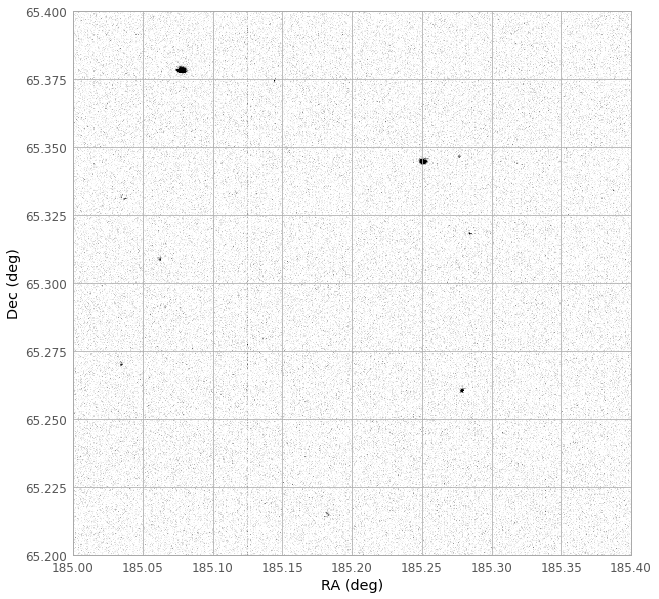

In [323]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(science_data1, interpolation='none', cmap='Greys', 
          extent = [ralim[1], ralim[0], declim[0], declim[1]], clim = (0,100), aspect='auto')

plt.xlim(185.0,185.4)
plt.ylim(65.2,65.4)

plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)");

## SExtractor Catalogs

In [324]:
refdf = pd.read_table('~/ztfsex/ref.cat', names=['NUMBER',
'X_IMAGE',
'Y_IMAGE',
'XWIN_IMAGE',
'YWIN_IMAGE',
'XMODEL_IMAGE',
'YMODEL_IMAGE',
'FLUX_AUTO',
'FLUX_MODEL',
'MAG_AUTO',
'MAG_MODEL',
'FLUX_RADIUS',
'FLAGS',
'NITER_MODEL',
'ALPHA_SKY',
'DELTA_SKY',
'THETA_WORLD'], skiprows=17, delim_whitespace=True)

diffdf = pd.read_table('~/ztfsex/diff.cat', names=['NUMBER',
'X_IMAGE',
'Y_IMAGE',
'XWIN_IMAGE',
'YWIN_IMAGE',
'XMODEL_IMAGE',
'YMODEL_IMAGE',
'FLUX_AUTO',
'FLUX_MODEL',
'MAG_AUTO',
'MAG_MODEL',
'FLUX_RADIUS',
'FLAGS',
'NITER_MODEL',
'ALPHA_SKY',
'DELTA_SKY',
'THETA_WORLD'], skiprows=17, delim_whitespace=True)


In [325]:
refdf

,NUMBER,X_IMAGE,Y_IMAGE,XWIN_IMAGE,YWIN_IMAGE,XMODEL_IMAGE,YMODEL_IMAGE,FLUX_AUTO,FLUX_MODEL,MAG_AUTO,MAG_MODEL,FLUX_RADIUS,FLAGS,NITER_MODEL,ALPHA_SKY,DELTA_SKY,THETA_WORLD
0,1,106.1428,81.5823,106.1452,81.3903,106.1212,81.4162,9459.741,9587.694,-9.9397,-9.9543,1.546,0,114,186.004494,65.363059,-79.31
1,2,366.5318,475.0735,366.5468,474.8824,366.5516,474.9395,9210.522,9386.072,-9.9107,-9.9312,1.533,0,73,186.151767,65.247332,-71.70
2,3,439.6944,402.0551,439.7159,401.9519,439.7075,401.9770,2849.034,3015.146,-8.6367,-8.6983,1.487,0,59,186.204808,65.265540,-83.62
3,4,490.2754,385.4096,490.3217,385.1494,490.3707,385.4651,201069.200,177137.400,-13.2584,-13.1208,1.570,16,56,186.239311,65.268764,63.42
4,5,269.2091,326.6755,269.2364,326.5275,269.2369,326.5318,4804.375,5038.203,-9.2041,-9.2557,1.516,0,74,186.096959,65.290970,-61.30
5,6,493.4649,289.8722,493.4646,289.7093,493.4717,289.7839,7324.532,8079.649,-9.6620,-9.7685,1.537,16,39,186.247664,65.295086,-74.42
6,7,142.5566,277.9377,142.5443,277.7582,142.5470,277.8408,7463.265,7670.281,-9.6823,-9.7120,1.499,0,37,186.016245,65.307804,-78.39
7,8,213.5133,259.2403,213.5415,259.0061,213.5115,259.1134,39865.780,40065.550,-11.5015,-11.5069,1.560,0,41,186.064400,65.311098,62.72
8,9,251.4941,251.2800,251.4810,251.1410,251.4924,251.1766,3027.074,3423.042,-8.7026,-8.8360,1.532,0,30,186.090049,65.312288,-72.39
9,10,109.7536,221.5978,109.8383,221.6419,109.8643,221.6583,1915.659,1932.917,-8.2058,-8.2155,3.215,0,35,185.998072,65.324246,-40.14


In [326]:
diffdf

,NUMBER,X_IMAGE,Y_IMAGE,XWIN_IMAGE,YWIN_IMAGE,XMODEL_IMAGE,YMODEL_IMAGE,FLUX_AUTO,FLUX_MODEL,MAG_AUTO,MAG_MODEL,FLUX_RADIUS,FLAGS,NITER_MODEL,ALPHA_SKY,DELTA_SKY,THETA_WORLD
0,1,503.1211,1529.0396,503.3874,1528.2999,503.2475,1528.6663,4.699205e+03,10036.75,-9.1801,-10.0040,1.027,0,91,186.377628,65.313782,-88.18
1,2,927.4387,1576.5729,927.3816,1576.4155,927.3794,1576.4317,1.628588e+04,16488.29,-10.5295,-10.5429,1.990,0,33,186.089982,65.312222,-52.44
2,3,691.5524,1708.4601,691.5854,1708.1253,691.5716,1708.2406,2.595288e+04,25765.61,-11.0355,-11.0276,2.323,0,37,186.239340,65.268843,-79.67
3,4,10.9789,1439.4927,10.9789,1439.4926,0.0000,0.0000,1.115040e+07,0.00,-17.6182,99.0000,4904.597,56,0,186.713762,65.324525,83.89
4,5,72.3022,1314.5347,72.3022,1314.5347,0.0000,0.0000,-1.138748e+05,0.00,99.0000,99.0000,0.000,51,0,186.681574,65.361301,83.69
5,6,72.1534,327.3397,72.1534,327.3397,0.0000,0.0000,0.000000e+00,0.00,99.0000,99.0000,0.000,50,0,186.752896,65.637381,83.89
6,7,67.7209,2372.9482,67.7209,2372.9483,67.7254,2372.9485,-1.889692e+06,102652.30,99.0000,-12.5284,58.620,51,10,186.609800,65.065114,83.81
7,8,3066.4312,2842.2798,3066.2940,2842.3675,3066.2271,2842.4694,7.773965e+03,13576.48,-9.7266,-10.3320,1.132,16,36,184.590684,65.008257,39.86
8,9,2886.7805,2959.8325,2860.7589,2943.0817,2958.0667,2949.3649,1.436353e+07,26716970.00,-17.8932,-18.5670,141.568,19,144,184.704064,64.971562,-1.38
9,10,2231.6165,2960.6719,2109.2412,2974.6742,2231.3947,2958.9824,2.652745e+07,27308610.00,-18.5592,-18.5907,303.428,19,43,185.138249,64.956944,-3.04


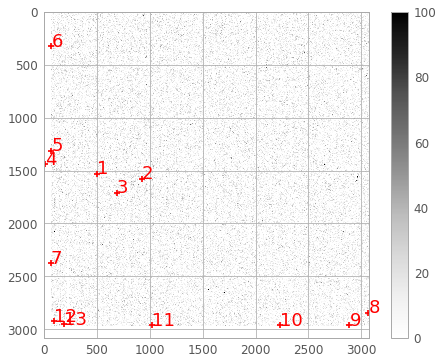

In [327]:
plt.figure()
plt.imshow(science_data1, interpolation='none', cmap='Greys', clim=(0,100))
plt.colorbar()

plt.scatter(diffdf["X_IMAGE"]-1, diffdf["Y_IMAGE"]-1, color='r', marker='+')
for i,txt in enumerate(diffdf["NUMBER"].values):
    plt.annotate(txt, (diffdf["X_IMAGE"].values[i], diffdf["Y_IMAGE"].values[i]), color='r', fontsize=18)

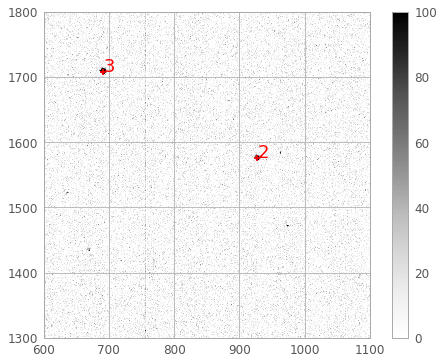

In [328]:
plt.figure()
plt.imshow(science_data1, interpolation='none', cmap='Greys', clim=(0,100))
plt.xlim(600,1100)
plt.ylim(1300,1800)
plt.colorbar()

plt.scatter(diffdf["X_IMAGE"]-1, diffdf["Y_IMAGE"]-1, color='r', marker='+')
for i,txt in enumerate(diffdf["NUMBER"].values):
    plt.annotate(txt, (diffdf["X_IMAGE"].values[i], diffdf["Y_IMAGE"].values[i]), color='r', fontsize=18)

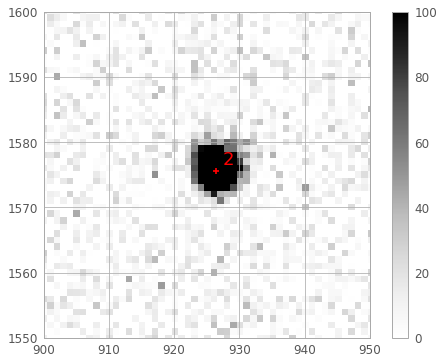

In [329]:
plt.figure()
plt.imshow(science_data1, interpolation='none', cmap='Greys', clim=(0,100))
plt.xlim(900,950)
plt.ylim(1550,1600)
plt.colorbar()

plt.scatter(diffdf["X_IMAGE"]-1, diffdf["Y_IMAGE"]-1, color='r', marker='+')
for i,txt in enumerate(diffdf["NUMBER"].values):
    plt.annotate(txt, (diffdf["X_IMAGE"].values[i], diffdf["Y_IMAGE"].values[i]), color='r', fontsize=18)

In [330]:
with fits.open('diff_Files-part1/ztfref.fits') as hdu:

    ref_data1 = hdu[0].data
    ref_header1 = hdu[0].header

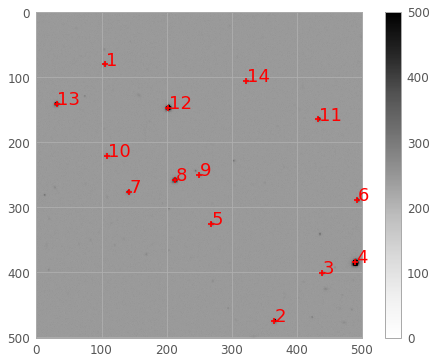

In [331]:
plt.figure()
plt.imshow(ref_data1, interpolation='none', cmap='Greys', clim=(0,500))
plt.colorbar()
plt.scatter(refdf["X_IMAGE"]-1, refdf["Y_IMAGE"]-1, color='r', marker='+')

for i,txt in enumerate(refdf["NUMBER"].values):
    plt.annotate(txt, (refdf["X_IMAGE"].values[i], refdf["Y_IMAGE"].values[i]), color='r', fontsize=18)

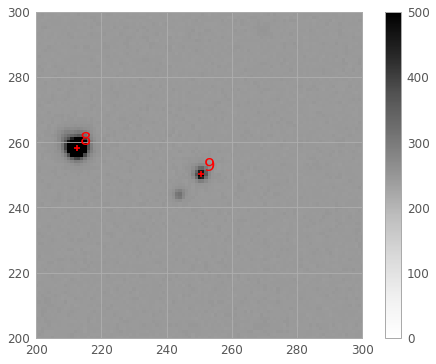

In [332]:
plt.figure()
plt.imshow(ref_data1, interpolation='none', cmap='Greys', clim=(0,500))
plt.colorbar()
plt.scatter(refdf["X_IMAGE"]-1, refdf["Y_IMAGE"]-1, color='r', marker='+')

for i,txt in enumerate(refdf["NUMBER"].values):
    plt.annotate(txt, (refdf["X_IMAGE"].values[i], refdf["Y_IMAGE"].values[i]), color='r', fontsize=18)

plt.xlim(200,300)
plt.ylim(200,300);


### Finding Zenith Angle

We can use some astropy tools to find the icrs coordinates of the observation zenith and compare the zenith-catalogue position angle and the catalogue-diffimg position angle

In [22]:
mtn = EarthLocation.of_site('Palomar')
mjd = Time(58885.28807871, format='mjd')

zenith = SkyCoord(AltAz(alt=90 * u.degree, az=0 * u.degree, obstime = mjd, location=mtn)).transform_to(ICRS())
zenith

<SkyCoord (ICRS): (ra, dec) in deg
    (122.40839441, 33.41638728)>

In [334]:
cata = SkyCoord(refdf["ALPHA_SKY"][refdf["NUMBER"] == 9].values * u.degree, 
                refdf["DELTA_SKY"][refdf["NUMBER"] == 9].values * u.degree, frame='icrs')
diff = SkyCoord(diffdf["ALPHA_SKY"][diffdf["NUMBER"] == 2].values * u.degree, 
                diffdf["DELTA_SKY"][diffdf["NUMBER"] == 2].values * u.degree, frame='icrs')

[29.69768519]
[29.6977668]


In [335]:
print("Difference in position angle = {} arcsec".format(
zenith.position_angle(cata).arcsecond - zenith.position_angle(diff).arcsecond))

Difference in position angle = [-0.2937797] arcsec


## Separation Stats

In [2]:
import importlib
import ztf_shift_stats
importlib.reload(ztf_shift_stats)
from ztf_shift_stats import *


https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2018/0411/467847/ztf_20180411467847_000535_zr_c11_o_q3_sciimg.fits



In [590]:
getsciimg(filefracday='20200206287824', paddedfield='000819',filtercode = 'zg',paddedccdid = '13',imgtypecode ='o', qid = '2', flip=False)
getrefimg(paddedfield='000819',filtercode = 'zg',paddedccdid = '13', qid = '2')

In [3]:
sci_cata = srcext('20200206287824_000819_sciimg.fits', det_thresh=15, ana_thresh=15)

/Users/Riley/Desktop/Flarubin
20200206287824_000819_sciimg.fits
True
/Users/Riley/Desktop/Flarubin/srcext


> 
----- SExtractor 2.19.5 started on 2022-03-11 at 14:44:23 with 1 thread

> Setting catalog parameters
> Reading PSF information
> Preparing profile models
Fitting model: Sersic spheroid
> Reading detection filter
> Initializing check-image(s)
> Initializing catalog
> Looking for 20200206287824_000819_sciimg.fits
----- Measuring from: 20200206287824_000819_sciimg.fits
      "Unnamed" / no ext. header / 3072x3080 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up background map at line:  704
> Setting up background map at line:  768
>

In [4]:
ref_cata = srcext('000819_refimg.fits', det_thresh=15, ana_thresh=15)

/Users/Riley/Desktop/Flarubin
000819_refimg.fits
True
/Users/Riley/Desktop/Flarubin/srcext


> 
----- SExtractor 2.19.5 started on 2022-03-11 at 14:44:34 with 1 thread

> Setting catalog parameters
> Reading PSF information
> Preparing profile models
Fitting model: Sersic spheroid
> Reading detection filter
> Initializing check-image(s)
> Initializing catalog
> Looking for 000819_refimg.fits
----- Measuring from: 000819_refimg.fits
      "Unnamed" / no ext. header / 3200x3200 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up background map at line:  704
> Setting up background map at line:  768
> Setting up background map at 

In [5]:
sci_cata.head()

,X_IMAGE,Y_IMAGE,XWIN_IMAGE,YWIN_IMAGE,XMODEL_IMAGE,YMODEL_IMAGE,FLUX_AUTO,FLUX_MODEL,MAG_AUTO,MAG_MODEL,FLUX_RADIUS,FLAGS,NITER_MODEL,ALPHA_SKY,DELTA_SKY,THETA_WORLD,ELLIPTICITY
NUMBER,,,,,,,,,,,,,,,,,
1,1619.8564,2.2303,1619.3916,1.7572,1618.9135,-0.9282,114061.60,492387.00,-12.6428,-14.2308,2.605,24,54,185.721921,65.771153,-3.28,0.589
2,430.8217,52.1687,430.8111,52.1175,430.8046,52.1208,27403.37,28232.34,-11.0945,-11.1269,2.019,0,33,186.528985,65.724892,-35.34,0.058
3,246.5681,76.7028,246.4967,76.4673,246.5245,76.5483,365680.60,369706.70,-13.9078,-13.9196,2.042,0,47,186.652593,65.712645,88.44,0.033
4,1568.8157,125.3370,1568.7726,125.1708,1568.7711,125.1984,75844.66,77804.44,-12.1998,-12.2275,1.997,0,34,185.749026,65.735395,-65.77,0.041
5,883.0072,127.9156,883.0111,127.8498,883.0036,127.8526,26204.86,27868.56,-11.0460,-11.1128,2.006,0,38,186.215980,65.716485,-59.94,0.018


In [6]:
ref_cata.head()

,X_IMAGE,Y_IMAGE,XWIN_IMAGE,YWIN_IMAGE,XMODEL_IMAGE,YMODEL_IMAGE,FLUX_AUTO,FLUX_MODEL,MAG_AUTO,MAG_MODEL,FLUX_RADIUS,FLAGS,NITER_MODEL,ALPHA_SKY,DELTA_SKY,THETA_WORLD,ELLIPTICITY
NUMBER,,,,,,,,,,,,,,,,,
1,264.0418,74.9009,264.0797,74.6049,264.0491,74.8932,212460.200,195239.20,-13.3182,-13.2264,1.597,0,60,184.842425,65.816773,63.78,0.047
2,2962.4246,70.0766,2962.4949,69.8881,2962.5051,69.9745,13044.330,13431.35,-10.2886,-10.3203,1.592,0,54,186.662531,65.750166,-28.71,0.036
3,2999.9924,58.6568,3000.1409,57.0009,3000.4942,53.3900,8462.265,84621.73,-9.8187,-12.3187,3.013,17,124,186.688609,65.752222,-6.02,0.719
4,823.3461,59.5305,823.4457,58.4326,823.4520,56.4702,4703.413,15388.57,-9.1810,-10.4680,5.308,17,33,185.221231,65.808723,-5.86,0.768
5,1659.8218,81.9015,1659.8600,81.6223,1659.8319,81.8822,55255.910,51991.50,-11.8559,-11.7898,1.582,0,54,185.784494,65.782393,69.88,0.044


In [7]:
print(sci_cata.shape, ref_cata.shape)

(154, 17) (483, 17)


In [8]:
with fits.open('srcext/20200206287824_000819_sciimg.fits') as hdu:
    sci_data = hdu[0].data
    sci_header = hdu[0].header

with fits.open('srcext/000819_refimg.fits') as hdu:
    ref_data = hdu[0].data
    ref_header = hdu[0].header

In [9]:
print(sci_data.shape)
print(ref_data.shape)

(3080, 3072)
(3200, 3200)


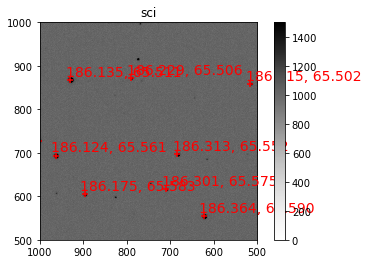

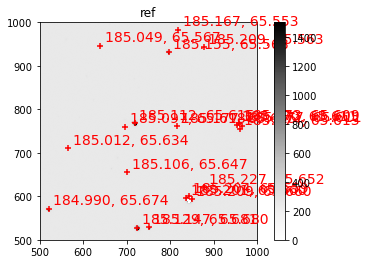

In [10]:
annotate=True

images = {"sci":sci_data, "ref":ref_data}
cats = {"sci":sci_cata, "ref":ref_cata}
it = "sci"

for it in ["sci", "ref"]:
    plt.figure()
    plt.imshow(images[it], interpolation='none', origin='lower', cmap='Greys', clim=(0,1500))
    plt.colorbar()
    plt.xlim(500,1000)
    plt.ylim(500,1000)

    plt.title(it)

    if it == "sci":
        plt.gca().invert_xaxis()

    if annotate:
        plt.scatter(cats[it]["X_IMAGE"], cats[it]["Y_IMAGE"], color='r', marker='+')
        for i in range(len(cats[it]["X_IMAGE"])):
            plt.annotate('{0:.3f}, {1:.3f}'.format(cats[it]["ALPHA_SKY"].values[i], cats[it]["DELTA_SKY"].values[i]), 
            (cats[it]["X_IMAGE"].values[i]+10, cats[it]["Y_IMAGE"].values[i]+10), color='r', fontsize=14)




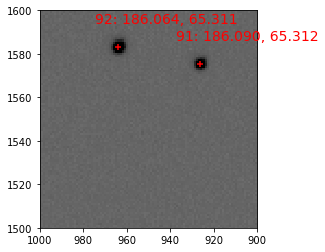

'\nplt.imshow(ref_data, interpolation=\'none\', cmap=\'Greys\', clim=(0,500))\nplt.xlim(600,1000)\nplt.ylim(400,800)\nplt.scatter(ref_cata["X_IMAGE"], ref_cata["Y_IMAGE"], color=\'r\', marker=\'+\')\nfor i in range(len(ref_cata["X_IMAGE"])):\n    plt.annotate(\'{0}: {1:.3f}, {2:.3f}\'.format(ref_cata.index[i], ref_cata["ALPHA_SKY"].values[i], ref_cata["DELTA_SKY"].values[i]), \n    (ref_cata["X_IMAGE"].values[i]+10, ref_cata["Y_IMAGE"].values[i]+10), color=\'r\', fontsize=14)\n'

In [11]:
plt.imshow(sci_data, interpolation='none', cmap='Greys', clim=(0,1500))
plt.xlim(900,1000)
plt.ylim(1500,1600)
plt.scatter(sci_cata["X_IMAGE"]-1, sci_cata["Y_IMAGE"]-1, color='r', marker='+')
for i in range(len(sci_cata["X_IMAGE"])):
    plt.annotate('{0}: {1:.3f}, {2:.3f}'.format(sci_cata.index[i], sci_cata["ALPHA_SKY"].values[i], sci_cata["DELTA_SKY"].values[i]), 
    (sci_cata["X_IMAGE"].values[i]+10, sci_cata["Y_IMAGE"].values[i]+10), color='r', fontsize=14)
plt.gca().invert_xaxis()
plt.show()
'''
plt.imshow(ref_data, interpolation='none', cmap='Greys', clim=(0,500))
plt.xlim(600,1000)
plt.ylim(400,800)
plt.scatter(ref_cata["X_IMAGE"], ref_cata["Y_IMAGE"], color='r', marker='+')
for i in range(len(ref_cata["X_IMAGE"])):
    plt.annotate('{0}: {1:.3f}, {2:.3f}'.format(ref_cata.index[i], ref_cata["ALPHA_SKY"].values[i], ref_cata["DELTA_SKY"].values[i]), 
    (ref_cata["X_IMAGE"].values[i]+10, ref_cata["Y_IMAGE"].values[i]+10), color='r', fontsize=14)
'''

### Astropy X-Matching

In [12]:
ind, d2d, d3d = xmatch(sci_cata,ref_cata)

In [13]:
seps = d2d.to(u.arcsec).value

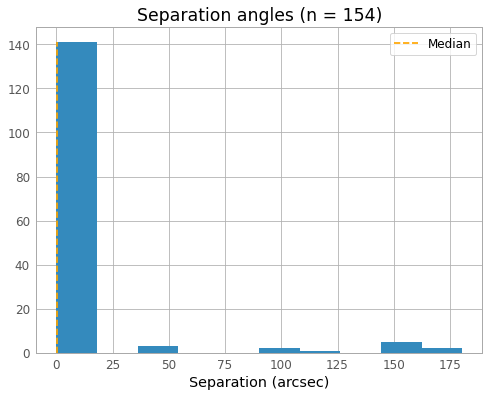

In [18]:
plt.hist(seps, bins=10)
counts, bin_edges = np.histogram(seps, bins=10)
plt.vlines(np.median(seps), 0, counts.max(), color='orange', ls='--', label='Median')
plt.xlabel('Separation (arcsec)')
plt.title('Separation angles (n = {})'.format(len(seps)))
plt.legend()

In [15]:
small_seps = seps[seps < 1]

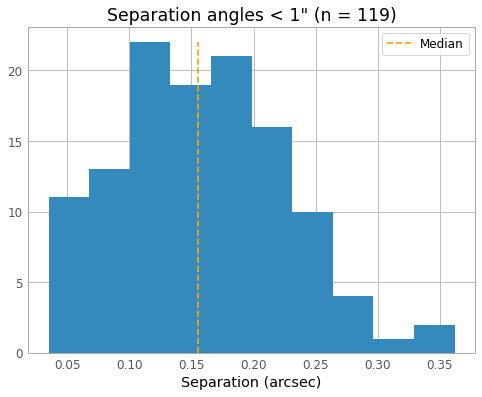

In [19]:
plt.hist(small_seps, bins=10)
counts, bin_edges = np.histogram(small_seps, bins=10)
plt.vlines(np.median(small_seps), 0, counts.max(), color='orange', ls='--', label='Median')
plt.xlabel('Separation (arcsec)')
plt.title('Separation angles < 1" (n = {})'.format(len(seps[seps < 1])))
plt.legend()

In [20]:
ref_coord = SkyCoord(ref_cata["ALPHA_SKY"][ind].values * u.degree, 
                ref_cata["DELTA_SKY"][ind].values * u.degree, frame='icrs')
sci_coord = SkyCoord(sci_cata["ALPHA_SKY"].values * u.degree, 
                sci_cata["DELTA_SKY"].values * u.degree, frame='icrs')

In [23]:
theta_1 = ref_coord.position_angle(zenith).arcsecond
theta_2 = ref_coord.position_angle(sci_coord).arcsecond

In [24]:
proj = seps[seps < 1] * np.cos(theta_1[seps < 1] - theta_2[seps < 1])

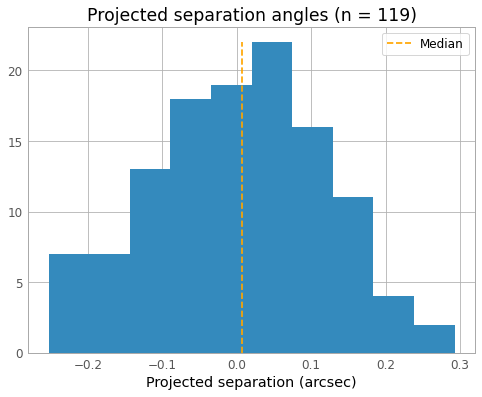

In [25]:
plt.hist(proj, bins=10)
counts, bin_edges = np.histogram(proj, bins=10)
plt.vlines(np.median(proj), 0, counts.max(), color='orange', ls='--', label='Median')
plt.xlabel('Projected separation (arcsec)')
plt.title('Projected separation angles (n = {})'.format(len(proj)))
plt.legend();

In [26]:
sci_cata[["X_IMAGE","Y_IMAGE"]][seps < 1].values[75]

array([ 927.3715, 1576.3336])

In [106]:
proj[75]

0.033876706459154

In [28]:
seps[75]

0.14859240200180687

In [58]:
good_sep = seps < 1

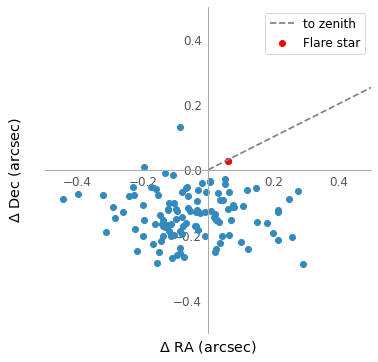

In [105]:
#Calc delta coords
d_ra = (ref_cata["ALPHA_SKY"].values[ind][good_sep] - sci_cata["ALPHA_SKY"].values[good_sep]) * 3600
d_dec = (ref_cata["DELTA_SKY"].values[ind][good_sep] - sci_cata["DELTA_SKY"].values[good_sep]) * 3600

#Calc zenith delta coord
d_zra = (ref_cata["ALPHA_SKY"].values[ind][good_sep].mean() - zenith.ra.value) * 3600
d_zdec = (ref_cata["DELTA_SKY"].values[ind][good_sep].mean() - zenith.dec.value) * 3600

#Plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(d_ra,d_dec)
ax.scatter(d_ra[75],d_dec[75], color='r', label="Flare star")
ax.plot([0,d_zra],[0,d_zdec], c='gray',ls='--', label="to zenith")

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xlabel(r"$\Delta$ RA (arcsec)", labelpad=150)
ax.set_ylabel(r"$\Delta$ Dec (arcsec)", labelpad=150)
ax.set_xticks([-0.4,-0.2,0.2,0.4])
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.legend()
ax.grid(False)
plt.gca().set_aspect('equal')

## Another visualization of the shifts

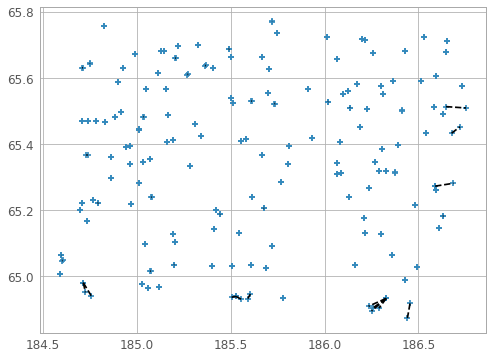

In [40]:
plt.scatter([ref_cata["ALPHA_SKY"].values[ind], sci_cata["ALPHA_SKY"].values], 
[ref_cata["DELTA_SKY"].values[ind],sci_cata["DELTA_SKY"].values], marker='+')

plt.plot([ref_cata["ALPHA_SKY"].values[ind], sci_cata["ALPHA_SKY"].values], 
[ref_cata["DELTA_SKY"].values[ind],sci_cata["DELTA_SKY"].values], color='k', ls='--')

Zoom in on a subsample of sub 1" separated pairs

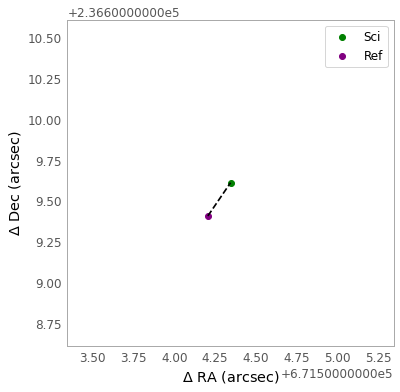

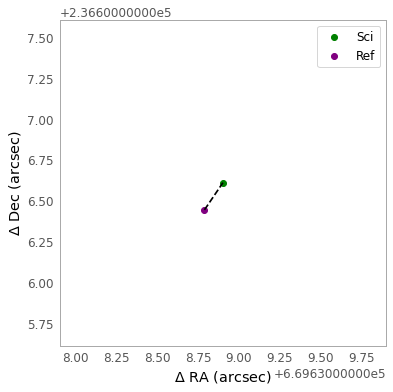

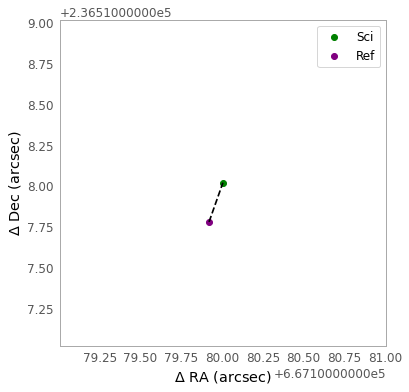

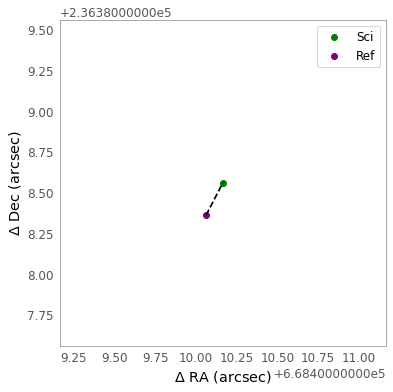

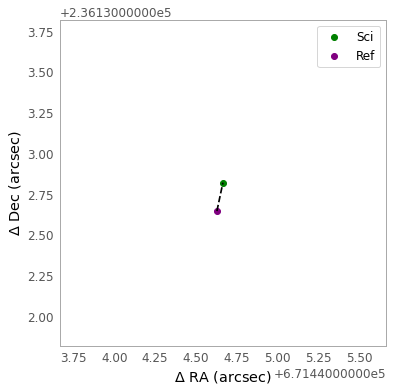

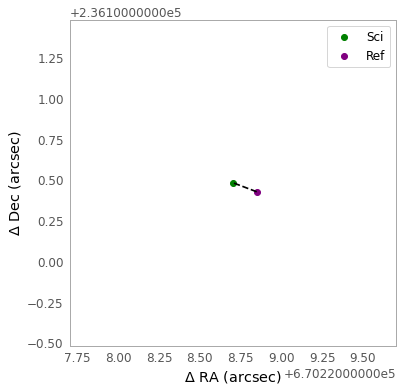

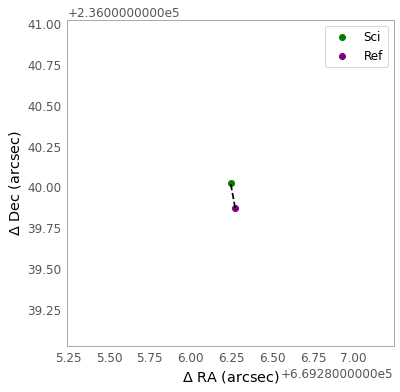

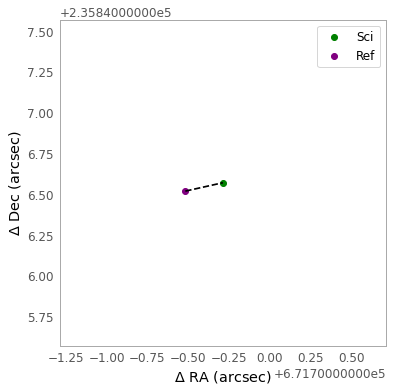

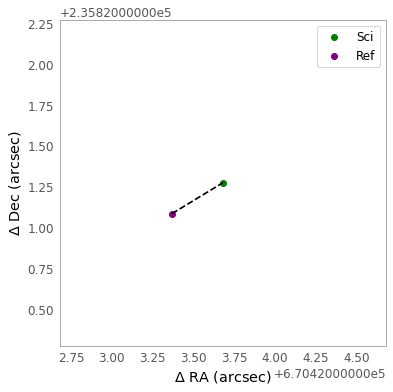

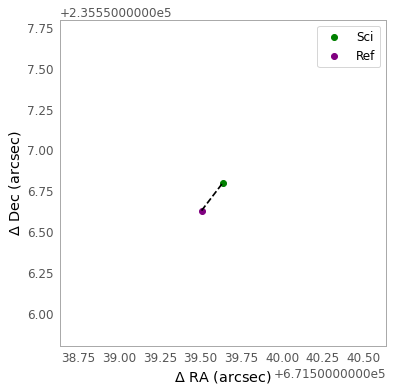

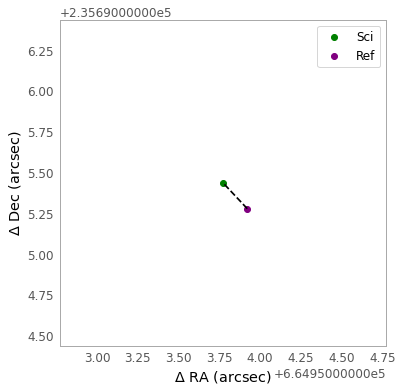

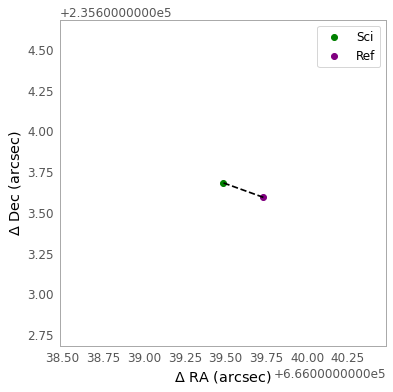

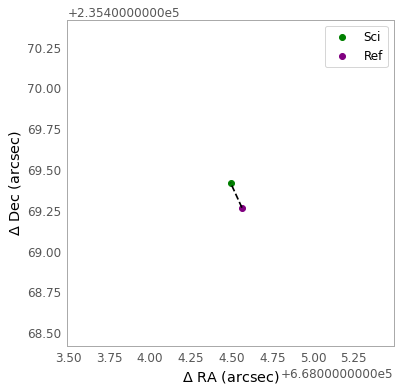

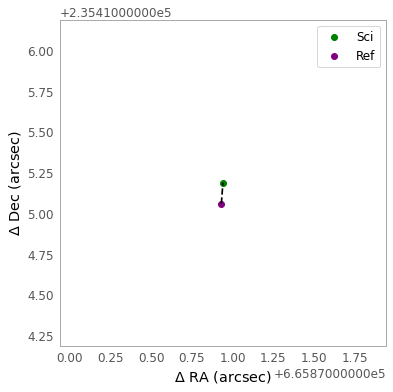

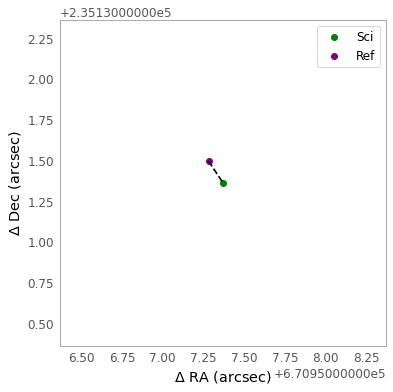

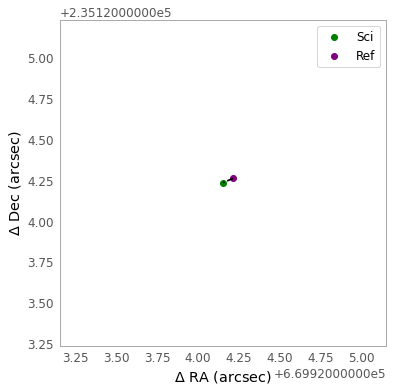

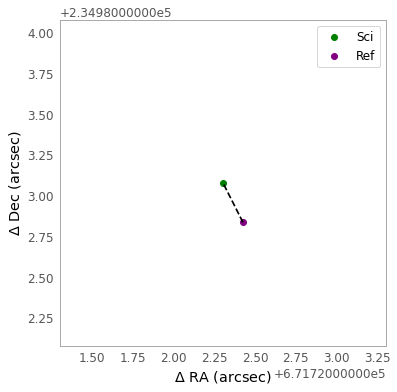

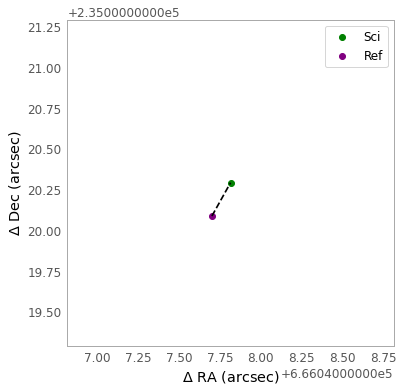

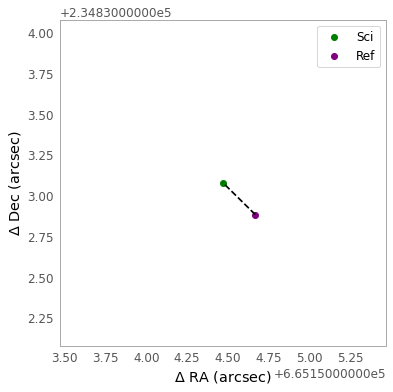

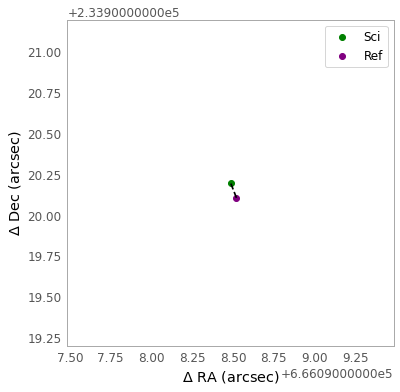

In [93]:
for i in range(0,100,5):

    ext = [(sci_cata["ALPHA_SKY"].values[good_sep][i] * 3600)-1,(sci_cata["ALPHA_SKY"].values[good_sep][i] * 3600)+1,
           (sci_cata["DELTA_SKY"].values[good_sep][i] * 3600)-1,(sci_cata["DELTA_SKY"].values[good_sep][i] * 3600)+1]

    plt.imshow(sci_data, interpolation='none', cmap='Greys', clim=(0,1500))

    plt.scatter(sci_cata["ALPHA_SKY"].values[good_sep][i] * 3600, sci_cata["DELTA_SKY"].values[good_sep][i] * 3600, c='green', label='Sci')

    plt.scatter(ref_cata["ALPHA_SKY"].values[ind][good_sep][i] * 3600, ref_cata["DELTA_SKY"].values[ind][good_sep][i] * 3600, c='purple', label='Ref')

    plt.plot([ref_cata["ALPHA_SKY"].values[ind][good_sep][i] * 3600, sci_cata["ALPHA_SKY"].values[good_sep][i] * 3600], 
    [ref_cata["DELTA_SKY"].values[ind][good_sep][i] * 3600,sci_cata["DELTA_SKY"].values[good_sep][i] * 3600], color='k', ls='--')

    plt.xlim((sci_cata["ALPHA_SKY"].values[good_sep][i] * 3600)-1,(sci_cata["ALPHA_SKY"].values[good_sep][i] * 3600)+1)
    plt.ylim((sci_cata["DELTA_SKY"].values[good_sep][i] * 3600)-1,(sci_cata["DELTA_SKY"].values[good_sep][i] * 3600)+1)

    plt.grid(False)
    plt.xlabel(r"$\Delta$ RA (arcsec)")
    plt.ylabel(r"$\Delta$ Dec (arcsec)")
    plt.legend()
    plt.show()